In [44]:
import pandas as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('Feb-01-2024_Apr-30-2024_700920938717715.csv')

In [46]:
# df = pd.read_csv('Dec-24-2023_Mar-22-2024_1697294034132138.csv')

In [48]:
df.head()

,Post ID,Page ID,Page name,Title,Description,Duration (secs),Publish time,Caption type,Permalink,Is crosspost,Is share,Post type,Languages,Custom labels,Funded content status,Data comment,Date,Impressions,Reach,"Reactions, comments and shares",Reactions,Comments,Shares,Seconds viewed,Average Seconds viewed,Estimated earnings (USD),Ad CPM (USD),Ad impressions,Total clicks,Other clicks,Impressions from Unpaid posts,Impressions from Boosted posts,Reach from Organic posts,Reach from Boosted posts,3-second video views,1-minute video views,3-second viewers,1-minute viewers,3-second video views from Organic posts,3-second video views from Boosted posts,Engaged users,Negative feedback from users,Unique negative feedback from users,"Views by top audience (M, 25-34)","Views by top audience (F, 25-34)","Views by top audience (F, 35-44)","Views by top audience (M, 18-24)","Views by top audience (M, 35-44)","Views by top audience (F, 45-54)","Views by top audience (F, 18-24)","Views by top audience (M, 45-54)","Views by top audience (F, 55-64)","Views by top audience (M, 65+)","Views by top audience (M, 55-64)","Views by top audience (F, 65+)",Views by country (Pakistan (PK)),Views by country (India (IN)),Views by country (Cambodia (KH)),Views by country (United States (US)),Views by country (Italy (IT)),Views by country (Australia (AU)),Views by country (Romania (RO)),Views by country (Canada (CA)),Views by country (United Kingdom (GB)),Views by country (Iran (IR)),Views by country (United Arab Emirates (AE)),Views by country (Uzbekistan (UZ)),Views by country (Nepal (NP)),Views by country (Indonesia (ID)),Views by country (Nigeria (NG)),Views by country (Mexico (MX)),Views by country (Myanmar (MM)),Views by country (Brazil (BR)),Views by country (Germany (DE)),Views by country (Sierra Leone (SL)),Views by country (Mongolia (MN)),Views by country (Greece (GR)),Views by country (Morocco (MA)),Views by country (Colombia (CO)),Views by country (Egypt (EG)),Views by country (New Zealand (NZ)),Views by country (Malaysia (MY)),Views by country (Mauritius (MU)),Views by country (Saudi Arabia (SA)),Views by country (Afghanistan (AF)),Views by country (France (FR)),Views by country (Qatar (QA)),Views by country (Spain (ES)),Matched audience targeting consumption (Photo Click),REELS_PLAYS:COUNT,Views by country (Bhutan (BT)),Views by country (Bangladesh (BD)),Views by country (Portugal (PT)),Views by country (Kuwait (KW)),Views by country (Fiji (FJ)),Views by country (Algeria (DZ))
0,122115698228198697,247903501729335,HU.co,NaN,ISHQ MURSHID\n#ishqmurshid #humtv #bilalabbask...,232,02/13/2024 01:02,NaN,https://www.facebook.com/hu.4113/posts/pfbid02...,0,0,Video,NaN,NaN,NaN,NaN,Lifetime,127,115,8,8,0,0,1486.249,12.923,0.0,0.0,0.0,4,4.0,127,0,115,0,53.0,7.0,49.0,7.0,53,0,11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122115765920198697,247903501729335,HU.co,NaN,#ishqmurshid #humtv #bilalabbaskhan #moomalent...,183,02/13/2024 02:02,NaN,https://www.facebook.com/hu.4113/posts/pfbid0e...,0,0,Video,NaN,NaN,NaN,NaN,Lifetime,165,152,12,12,0,0,2861.595,17.773,0.0,0.0,0.0,7,7.0,165,0,152,0,61.0,13.0,53.0,11.0,61,0,17.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122116266764198697,247903501729335,HU.co,NaN,KHAIE \n#khaie #faysalquraishi #hinabayat #uzm...,216,02/13/2024 22:02,NaN,https://www.facebook.com/hu.4113/posts/pfbid0s...,0,0,Video,NaN,NaN,NaN,NaN,Lifetime,91,78,4,4,0,0,862.620,10.393,0.0,0.0,0.0,2,2.0,91,0,78,0,26.0,3.0,24.0,2.0,26,0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [49]:
pd.set_option('display.max_columns', None)

In [51]:
# df.info()

In [52]:
len(df)

153

In [7]:
# df['Duration (secs)'].value_counts()

In [53]:
df[['Publish time', 'Duration (secs)']].head()

,Publish time,Duration (secs)
0,02/13/2024 01:02,232
1,02/13/2024 02:02,183
2,02/13/2024 22:02,216
3,02/13/2024 23:02,182
4,02/14/2024 01:02,285


In [54]:
df['Publish time'] = pd.to_datetime(df['Publish time'])

In [55]:
len(df)

153

In [56]:
# Group by hour and calculate maximum duration
df['Hour'] = df['Publish time'].dt.hour
max_duration_by_hour = df.groupby('Hour')['Duration (secs)'].max()

In [57]:
df[['Publish time', 'Hour']].head()

,Publish time,Hour
0,2024-02-13 01:02:00,1
1,2024-02-13 02:02:00,2
2,2024-02-13 22:02:00,22
3,2024-02-13 23:02:00,23
4,2024-02-14 01:02:00,1


In [58]:
df['Date'] = df['Publish time'].dt.date
df['Day'] = df['Publish time'].dt.day
df['Month'] = df['Publish time'].dt.month

In [59]:
# Rename a single column
df.rename(columns={'Date': 'Full_Date'}, inplace=True)

In [60]:
# Rename a single column
df.rename(columns={'Day': 'Date'}, inplace=True)

In [17]:
# to check views on age basis
df.loc[
    df['Views by top audience (65+, F)'].notna(), 'Views by top audience (65+, F)'
]

29    3.0
31    2.0
44    0.0
45    0.0
50    3.0
61    3.0
85    1.0
86    3.0
87    5.0
Name: Views by top audience (65+, F), dtype: float64

In [17]:
# df[['Permalink', 'Post type','Data comment','Publish time', 'Full_Date', 'Hour', 'Date', 'Month', ', 'Engagements', 'Impressions','Duration (secs)', 'Likes', 'Shares', 'Reels plays']].head()

In [18]:
# df.columns.to_list()

In [61]:
df['Post type'].value_counts()

Video      104
FB reel     45
Photo        4
Name: Post type, dtype: int64

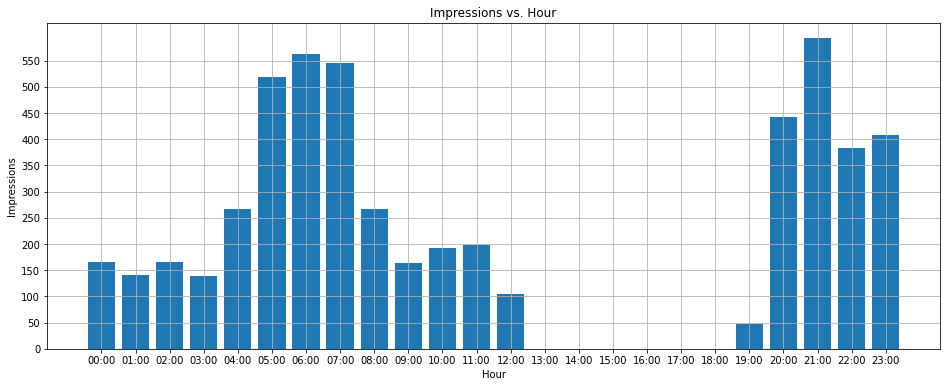

In [62]:
# Assuming df['Hour'] contains values from 0 to 23
plt.figure(figsize=(16, 6))  # Adjust width and height as needed
plt.bar(df['Hour'], df['Impressions'])
plt.xlabel('Hour')
plt.ylabel('Impressions')
plt.title('Impressions vs. Hour')

# Set custom x-axis tick labels
plt.xticks(range(24), [f"{hour:02}:00" for hour in range(24)])  # Format as HH:00
# plt.xticks(range(0, 24, 2), [f"{hour:02}:00" for hour in range(0, 24, 2)])

# Set custom y-axis ticks (every 50)
plt.yticks(range(0, max(df['Impressions']) + 1, 50))

# Show the plot
plt.grid(True)
plt.show()


### Task 
###### Engagment vs time 
###### Day base engagment if days available in data or can specify by itself
###### likes and views
##### views on time basis 

### Engagment Vs Time 

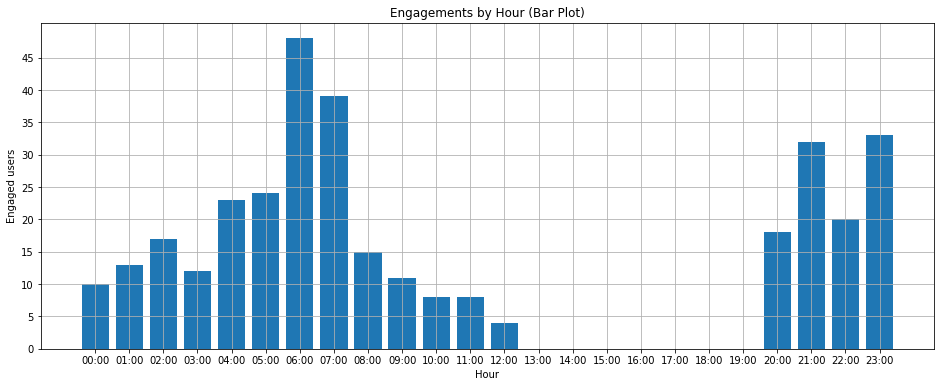

In [64]:
plt.figure(figsize=(16, 6))

# Create a bar plot
plt.bar(df['Hour'], df['Engaged users'])

plt.xlabel('Hour')
plt.ylabel('Engaged users')
plt.title('Engagements by Hour (Bar Plot)')

# Set custom x-axis tick labels
# plt.xticks(range(0, 24, 2), [f"{hour:02}:00" for hour in range(0, 24, 2)]) # for hour with the difference of 2 
plt.xticks(range(0, 24), [f"{hour:02}:00" for hour in range(0, 24)])

# Set custom y-axis ticks (every 5)
max_engagements = int(max(df['Engaged users']))
plt.yticks(range(0, max_engagements + 1, 5))

# Show the plot
plt.grid(True)
plt.show()

In [22]:
df['Engagements'].max()

55.0

JupyterRequireError: notebook/js/codecell: Timeout. Library 'notebook/js/codecell' is not loaded.

###  To Get the weekDays Name 

In [66]:
# Convert the 'Date' column to pandas datetime
df['Full_Date'] = pd.to_datetime(df['Full_Date'], errors='coerce')

# Get the day of the week (Monday, Tuesday, etc.)
df['DayOfWeek'] = df['Full_Date'].dt.day_name()

In [67]:
df[['Full_Date', 'DayOfWeek']].head()

,Full_Date,DayOfWeek
0,2024-02-13,Tuesday
1,2024-02-13,Tuesday
2,2024-02-13,Tuesday
3,2024-02-13,Tuesday
4,2024-02-14,Wednesday


In [68]:
df['DayOfWeek'].value_counts()

Tuesday      28
Thursday     26
Wednesday    25
Saturday     21
Monday       19
Friday       18
Sunday       16
Name: DayOfWeek, dtype: int64

### Performance On Basis Of Weekdays

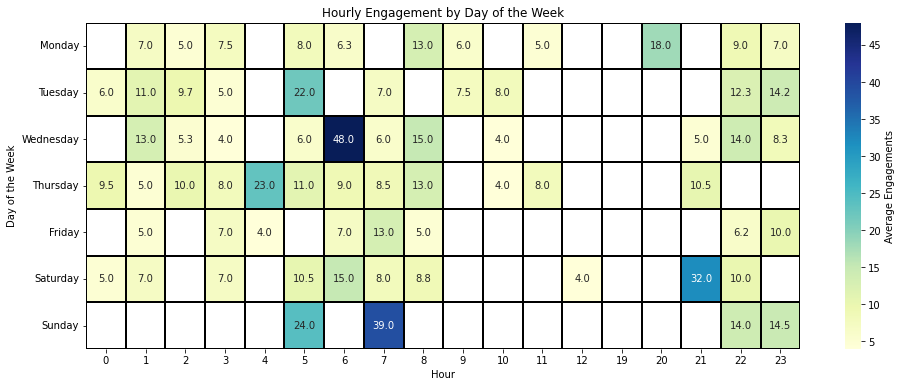

In [69]:
# Group by hour and day of the week, calculate the mean engagement
hourly_engagement = df.groupby(['Hour', 'DayOfWeek'])['Engaged users'].mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = hourly_engagement.pivot(index='DayOfWeek', columns='Hour', values='Engaged users')

# Set the order of weekdays for better visualization
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(index=weekday_order)

# Create the heatmap with added boundary
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Average Engagements'},
            linewidths=2, linecolor='black')  # Adjust linewidths and linecolor here
plt.title('Hourly Engagement by Day of the Week')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.show()

In [27]:
df['Engagements'].mean()

11.505376344086022

##  Instagram EDA

In [30]:
df_insta = pd.read_csv('insta_data.csv')

In [32]:
len(df_insta)

15

In [50]:
df_insta['Publish time'][1:4]

1   2024-02-23 22:02:00
2   2024-03-09 12:03:00
3   2024-03-13 07:03:00
Name: Publish time, dtype: datetime64[ns]

In [43]:
df_insta['Publish time'] = pd.to_datetime(df_insta['Publish time'])

In [54]:
df_insta['Date'] = df_insta['Publish time'].dt.date
df_insta['Day'] = df_insta['Publish time'].dt.day
df_insta['Month'] = df_insta['Publish time'].dt.month
df_insta['DayOfWeek'] = df_insta['Publish time'].dt.day_name()
df_insta['Hour'] = df_insta['Publish time'].dt.hour

In [55]:
df_insta[['Publish time', 'Day', 'Month', 'DayOfWeek', 'Hour']].head()

,Publish time,Day,Month,DayOfWeek,Hour
0,2024-02-21 05:02:00,21,2,Wednesday,5
1,2024-02-23 22:02:00,23,2,Friday,22
2,2024-03-09 12:03:00,9,3,Saturday,12
3,2024-03-13 07:03:00,13,3,Wednesday,7
4,2024-03-14 03:03:00,14,3,Thursday,3


In [56]:
df_insta.head(2)

,Post ID,Account ID,Account username,Account name,Description,Duration (secs),Publish time,Permalink,Post type,Data comment,Date,Impressions,Reach,Shares,Follows,Plays,Likes,Comments,Saves,Day,Month,DayOfWeek,Hour
0,18035715169751658,17841465176534235,hu4113.co,Hu.co,#reels #reelsinsta#reelsinstagramreels #reelsv...,27,2024-02-21 05:02:00,https://www.instagram.com/reel/C3nK6nQIGSD/,IG reel,NaN,2024-02-21,5,4,0,0,5,3,0,0,21,2,Wednesday,5
1,18022114208008141,17841465176534235,hu4113.co,Hu.co,#reelitfeelit #tiktok #trending #explore #inst...,5,2024-02-23 22:02:00,https://www.instagram.com/reel/C3uDDU_BtG7/,IG reel,NaN,2024-02-23,3,1,0,0,3,1,0,0,23,2,Friday,22


In [52]:
df_insta['Post type'].value_counts()

IG reel     14
IG image     1
Name: Post type, dtype: int64

In [64]:
df_insta[['Hour', 'Impressions', 'Reach', 'Shares', 'Likes']].head()

,Hour,Impressions,Reach,Shares,Likes
0,5,5,4,0,3
1,22,3,1,0,1
2,12,48,46,0,3
3,7,323,316,1,42
4,3,1,1,0,1


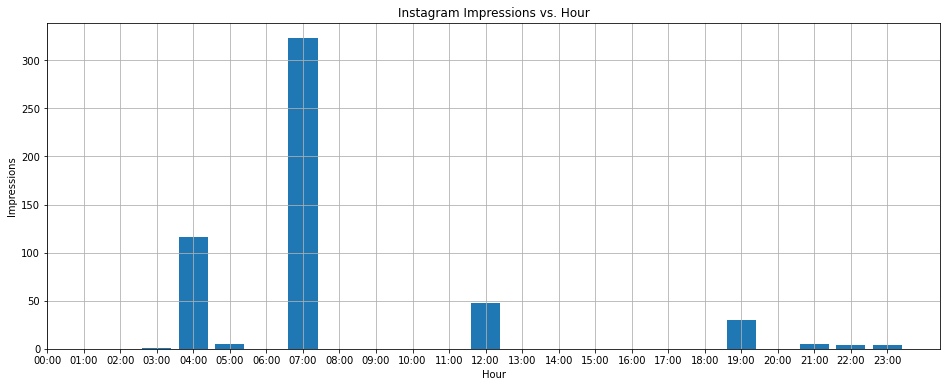

In [62]:
# Assuming df['Hour'] contains values from 0 to 23
plt.figure(figsize=(16, 6))  # Adjust width and height as needed
plt.bar(df_insta['Hour'], df_insta['Impressions'])
plt.xlabel('Hour')
plt.ylabel('Impressions')
plt.title('Instagram Impressions vs. Hour')

# Set custom x-axis tick labels
plt.xticks(range(24), [f"{hour:02}:00" for hour in range(24)])  # Format as HH:00
# plt.xticks(range(0, 24, 2), [f"{hour:02}:00" for hour in range(0, 24, 2)])

# Set custom y-axis ticks (every 50)
plt.yticks(range(0, max(df_insta['Impressions']) + 1, 50))

# Show the plot
plt.grid(True)
plt.show()


In [63]:
df_insta['Impressions'].max()

323

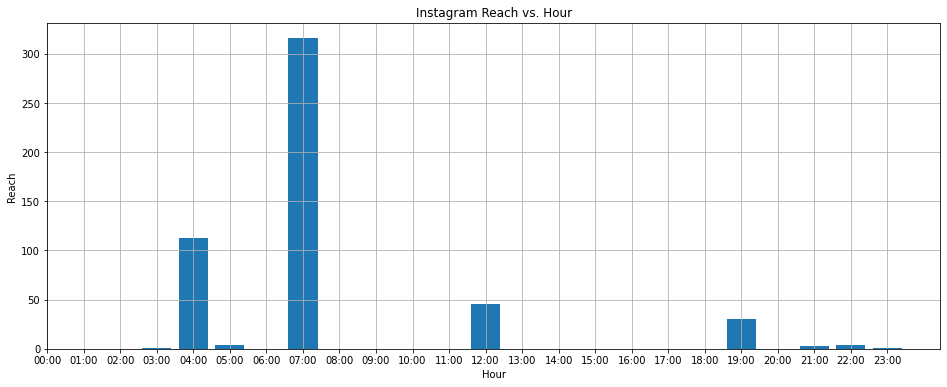

In [66]:
# Assuming df['Hour'] contains values from 0 to 23
plt.figure(figsize=(16, 6))  # Adjust width and height as needed
plt.bar(df_insta['Hour'], df_insta['Reach'])
plt.xlabel('Hour')
plt.ylabel('Reach')
plt.title('Instagram Reach vs. Hour')

# Set custom x-axis tick labels
plt.xticks(range(24), [f"{hour:02}:00" for hour in range(24)])  # Format as HH:00
# plt.xticks(range(0, 24, 2), [f"{hour:02}:00" for hour in range(0, 24, 2)])

# Set custom y-axis ticks (every 50)
plt.yticks(range(0, max(df_insta['Reach']) + 1, 50))

# Show the plot
plt.grid(True)
plt.show()


In [67]:
df_insta['Reach'].max()

316

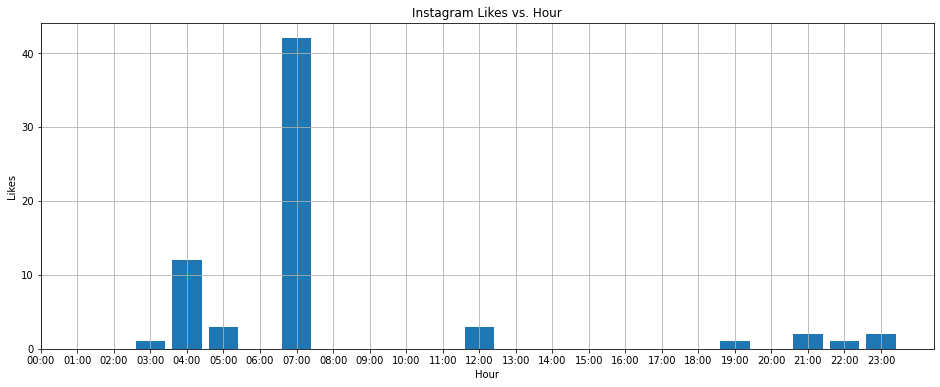

In [70]:
# Assuming df['Hour'] contains values from 0 to 23
plt.figure(figsize=(16, 6))  # Adjust width and height as needed
plt.bar(df_insta['Hour'], df_insta['Likes'])
plt.xlabel('Hour')
plt.ylabel('Likes')
plt.title('Instagram Likes vs. Hour')

# Set custom x-axis tick labels
plt.xticks(range(24), [f"{hour:02}:00" for hour in range(24)])  # Format as HH:00
# plt.xticks(range(0, 24, 2), [f"{hour:02}:00" for hour in range(0, 24, 2)])

# Set custom y-axis ticks (every 50)
plt.yticks(range(0, max(df_insta['Likes']) + 1, 10))

# Show the plot
plt.grid(True)
plt.show()

In [69]:
df_insta['Likes'].max()

42